## MB1_base

In [1]:
from pathlib import Path
root = Path('/data2/tmps/object-masking')  # Project Home

import sys
sys.path.insert(0, str(root))
sys.path.insert(0, str(root/'modules'))

In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from pyhej.utils import set_dir, set_parent
from pyhej.image.dicom import read_dicom
from pyhej.image.pillow import array_to_img

In [3]:
data_dir = Path('/data2/datasets/slyx/mb1_base')
save_dir = root/'tmps/dataset_mb1/hej_dataset_mb1'

set_dir(str(save_dir), rm=True)

data = []
data.extend([('may', str(item)) for item in sorted(data_dir.joinpath('may').glob('**/*.dcm'))])
data.extend([('jun', str(item)) for item in sorted(data_dir.joinpath('jun').glob('**/*.dcm'))])

In [4]:
mins, maxs = [], []
for i, (tag, path) in enumerate(data, 1):
    img_array = read_dicom(path)[0]
    mins.append(np.min(img_array))
    maxs.append(np.max(img_array))
    img = array_to_img(img_array - np.min(img_array), scale=True)
    filename = str(save_dir/'{:06d}{}.jpg'.format(i, tag))
    img.save(filename)

len(list(save_dir.iterdir()))

524

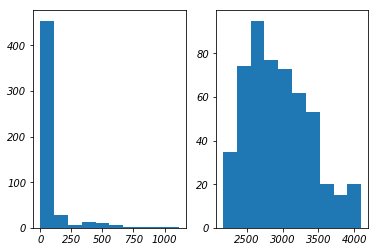

In [5]:
from matplotlib import pyplot as plt
plt.subplot(121), plt.hist(mins)
plt.subplot(122), plt.hist(maxs)
plt.show()